In [1]:
import numpy as np
from numpy.linalg import inv
import time

def magnitude(t, graph_params, dist, generate_points, range_params, time_lim):
  num_points_vec = np.linspace(range_params[0], range_params[1], range_params[2], dtype=int)
  magnitude_measures = []
  for num_points in num_points_vec:
    b = time.time()
    points = generate_points(t, num_points, graph_params)
    distance = -np.array([[dist(p1, p2, t, graph_params) for p1 in points] for p2 in points])
    exp_dist = np.exp(distance)
    exp_dist_inv = inv(exp_dist)
    magnitude = np.sum(exp_dist_inv)
    magnitude_measures.append(magnitude)
    e = time.time()
    if e - b > time_lim:
      break
  return magnitude_measures

In [2]:
def generate_points_interval(t, num_points, graph_params):
  return [i * t / num_points for i in range(num_points + 1)]

def dist_interval(p1, p2, t=None, graph_params=None):
  return abs(p1 - p2)

magnitude(t=100, graph_params=None, dist=dist_interval, generate_points=generate_points_interval, range_params=[10, 5000, 10], time_lim=120)

[10.999092042625952,
 50.86942277072784,
 50.96669128821263,
 50.98511867024859,
 50.99160035821054,
 50.994617074157254,
 50.99625632919888,
 50.99724806854572,
 50.99789125897364,
 50.99833339999657]

In [3]:
t_vec = np.linspace(10, 4000, 10, dtype=int)
magnitude_measures = [magnitude(t, None, dist_interval, generate_points_interval, [10, 3000, 4], time_lim=90) for t in t_vec]

In [4]:
magnitude_measures

[[5.621171572600098, 5.999958829276234, 5.9999896145367355, 5.999995370368205],
 [11.0, 223.7487893741353, 226.53948112708923, 227.07061015022734],
 [11.0, 421.55939152949213, 441.67599982006755, 445.69924053396574],
 [11.0, 586.8392303025834, 647.0813646817264, 660.0784745583506],
 [11.0, 714.7602903757903, 837.9502274435772, 867.1527683265839],
 [11.0, 808.5892255275515, 1012.0244268679922, 1065.5982775893774],
 [11.0, 874.7346223857533, 1168.094096837155, 1254.3410353967206],
 [11.0, 919.8050372481788, 1305.0131424753586, 1431.3972219638424],
 [11.0, 949.9832185429023, 1423.6112153681254, 1596.4323753426888],
 [11.0, 969.954114143492, 1525.2117334883283, 1749.348836043745]]

In [5]:
t_vec

array([  10,  453,  896, 1340, 1783, 2226, 2670, 3113, 3556, 4000])

Text(0, 0.5, 'magnitude')

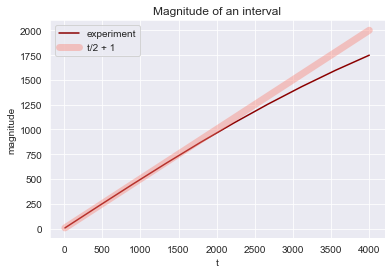

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

magnitude_res = [elem[-1] for elem in magnitude_measures]
real_mag = [t/2 + 1 for t in t_vec]
sns.lineplot(x=t_vec, y=magnitude_res, label='experiment', color='darkred')
sns.lineplot(x=t_vec, y=real_mag, alpha=0.4, linewidth=7, label='t/2 + 1', color='salmon')
plt.title('Magnitude of an interval')
plt.xlabel('t')
plt.ylabel('magnitude')

In [8]:
def dist_tree1(point1, point2, t=None, graph_params=None):
  if point1[1] == point2[1]:
    return abs(point1[0] - point2[0])
  return point1[0] + point2[0]


def generate_points_tree1(t, num_points, graph_params):
  edges_ = [edge * t for edge in graph_params]
  points = []
  for num_edge, edge in enumerate(edges_):
    new_points = [(i * edge / num_points, num_edge)   for i in range(1, num_points + 1)]
    points += new_points
  return points


In [9]:
magnitude(t=5, graph_params=[1, 2, 3, 4], dist=dist_tree1, generate_points=generate_points_tree1, range_params=[10, 1000, 5], time_lim=120)

[22.036301329840526,
 25.97490225837165,
 25.98883240045467,
 25.992867285473167,
 25.99477604417603]

In [10]:
t_vec = np.linspace(0.1, 500, 10)
magnitude_measures = [magnitude(t, [1, 2, 3, 4], dist_tree1, generate_points_tree1, [10, 1000, 4], time_lim=90) for t in t_vec]

In [11]:
magnitude_measures

[[1.490745328842436,
  1.499717946483898,
  1.4998567935474996,
  1.4999040345294141],
 [39.93102710940098,
  273.15644839855685,
  277.5832987814336,
  278.46557340589305],
 [39.99973306813797, 513.3415648742097, 544.5608320538756, 551.2458342246663],
 [39.9999989669155, 706.432174766896, 794.7752152888339, 815.9606848318663],
 [39.99999999600174, 853.3009229722812, 1023.0158860794897, 1069.318753457167],
 [39.999999999984524,
  962.6387302533448,
  1226.731183334791,
  1308.7887485640613],
 [39.99999999999994,
  1044.0737385550804,
  1405.6346663364209,
  1532.6619590923087],
 [40.0, 1105.4632385656791, 1561.0256025771364, 1740.0177447375393],
 [40.0, 1152.5297513203016, 1695.1060138669266, 1930.6200258103247],
 [40.0, 1189.2627285063734, 1810.4452337381754, 2104.777440056566]]

Text(0, 0.5, 'magnitude')

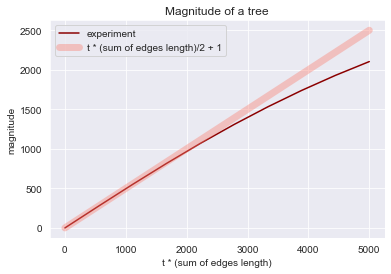

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

magnitude_res = [elem[-1] for elem in magnitude_measures]
real_mag = [t*(sum([1, 2, 3, 4]))/2 + 1 for t in t_vec]
t_len = [t*(sum([1, 2, 3, 4])) for t in t_vec]
sns.lineplot(x=t_len, y=magnitude_res, label='experiment', color='darkred')
sns.lineplot(x=t_len, y=real_mag, alpha=0.4, linewidth=7, label='t * (sum of edges length)/2 + 1', color='salmon')
plt.title('Magnitude of a tree')
plt.xlabel('t * (sum of edges length)')
plt.ylabel('magnitude')

In [14]:
def dist_cicle32(point1, point2, t, lengths): # distance for 2 vertices and 3 edges
  if point1[1] == point2[1]: # same edge
    path0 = abs(point1[0] - point2[0])
    l = lengths[point1[1]] * t
    x1, x2 = min(point1[0], point2[0]), max(point1[0], point2[0])
    for ind in range(3):
      if ind == point1[1]:
        continue
      if lengths[ind] + x1 + (l - x2) < path0:
        return lengths[ind] + x1 + (l - x2)
    return path0

  x1, x2 = point1[0], point2[0]
  l1, l2 = lengths[point1[1]], lengths[point2[1]]
  l3 = sum(lengths) - l1 - l2
  l1, l2, l3 = l1 * t, l2 * t, l3 * t
  # l1, l2, l3 are glued
  path1 = x1 + x2 # p1 -> 0 -> p2
  path2 = (l1 - x1) + (l2 - x2) # p1 -> l1 (glued to l2) -> p2
  path3 = x1 + l3 + (l2 - x2) # p1 -> 0 -> l3 (glued to l2) -> p2
  path4 = (l1 - x1) + l3 + x2 # p1 -> l2 (glued to l3) -> 0 -> p2
  return min(path1, path2, path3, path4)

def generate_points_cicle32(t, num_points, graph_params):
  edges_ = [edge * t for edge in graph_params]
  points = [(0, 0), (edges_[0], 0)]
  for num_edge, edge in enumerate(edges_):
    new_points = [(i * edge / num_points, num_edge) for i in range(1, num_points)]
    points += new_points
  return points

In [15]:
magnitude(t=1, graph_params=[1, 2, 3], dist=dist_cicle32, generate_points=generate_points_cicle32, range_params=[10, 2000, 5], time_lim=120)

[2.736969011539767,
 2.7581852218607565,
 2.7581933002490358,
 2.7581924908017754,
 2.7581949108858907]

In [52]:
# TESTS FOR DISTANCE OF A CICLE
test_vec = generate_points_cicle32(1, 5, [1, 2, 3])
assert dist_cicle32(test_vec[-1], test_vec[-8], 1, [1, 2, 3]) == 2
assert dist_cicle32(test_vec[0], test_vec[-1], 1, [1, 2, 3]) == 1.6
assert abs(dist_cicle32(test_vec[1], test_vec[-1], 1, [1, 2, 3]) - 0.6) < 0.0000001
assert abs(dist_cicle32(test_vec[2], test_vec[4], 1, [1, 2, 3]) - 0.4) < 0.0000001
assert abs(dist_cicle32(test_vec[-1], test_vec[-4], 1, [1, 2, 3]) - 1.8) < 0.0000001
test_vec = generate_points_cicle32(1, 10, [1, 2, 3])
assert abs(dist_cicle32(test_vec[-1], test_vec[-9], 1, [1, 2, 3]) - 1.6) < 0.0000001

In [54]:
t_vec = np.linspace(0.1, 100, 10)
magnitude_measures = [magnitude(t, [1, 2, 3], dist_cicle32, generate_points_cicle32, [10, 2000, 4], time_lim=90) for t in t_vec]

In [55]:
magnitude_measures

[[1.1113650109485036,
  1.1284259761148894,
  1.1285271913735373,
  1.128455382172926],
 [21.302793539956635,
  32.43103979467915,
  32.446372196027085,
  32.45151074546241],
 [26.572320451353573, 65.67488388302193, 65.7201591553918, 65.73293391491609],
 [28.051754779662687, 98.8760470766695, 98.98827814614299, 99.01544369158775],
 [28.528025608343373,
  132.00028805316407,
  132.2373786161627,
  132.2896077981779],
 [28.684623446197, 165.0200721736014, 165.4603327552823, 165.55222220514682],
 [28.73622686749414,
  197.90860931350932,
  198.65012989610028,
  198.80015094964938],
 [28.753233992893207,
  230.63983107944634,
  231.79982463917491,
  232.03027408154023],
 [28.758838971741625, 263.188439399578, 264.9025379934983, 265.23948749431594],
 [28.7606861583396, 295.52996515271775, 297.9514600648634, 298.424703306547]]

Text(0, 0.5, 'magnitude')

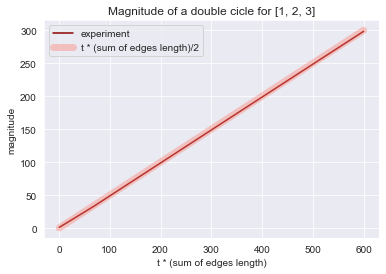

In [56]:
magnitude_res = [elem[-1] for elem in magnitude_measures]
real_mag = [t*(sum([1, 2, 3]))/2 for t in t_vec]
t_len = [t*(sum([1, 2, 3])) for t in t_vec]
sns.lineplot(x=t_len, y=magnitude_res, label='experiment', color='darkred')
sns.lineplot(x=t_len, y=real_mag, alpha=0.4, linewidth=7, label='t * (sum of edges length)/2', color='salmon')
plt.title('Magnitude of a double cicle for [1, 2, 3]')
plt.xlabel('t * (sum of edges length)')
plt.ylabel('magnitude')

In [57]:
print('t * l / 2 - result', 'difference between last measures (uncertainty)', sep='\t')
for elem in [(real_mag[i] - magnitude_res[i], magnitude_measures[i][-1] - magnitude_measures[i][-2]) for i in range(len(real_mag))]:
    print(elem[0], elem[1], sep='\t')

t * l / 2 - result	difference between last measures (uncertainty)
-0.8284553821729259	-7.180920061133911e-05
1.1484892545375942	0.005138549435322659
1.167066085083917	0.012774759524290857
1.1845563084122688	0.027165545444759687
1.210392201822117	0.05222918201522475
1.2477777948531923	0.0918894498645102
1.2998490503506446	0.15002105354909645
1.3697259184598067	0.2304494423653125
1.4605125056841075	0.33694950081763864
1.5752966934530264	0.47324324168357634


In [58]:
t_vec = np.linspace(0.1, 100, 10)
magnitude_measures = [magnitude(t, [2, 3, 4], dist_cicle32, generate_points_cicle32, [10, 2000, 4], time_lim=90) for t in t_vec]

In [59]:
magnitude_measures

[[1.190501600005284,
  1.1798690003436123,
  1.1800934571322492,
  1.1801011073520995],
 [26.09331081275414, 49.30655128233305, 49.32537135281611, 49.33147809645888],
 [28.649296330249847, 99.1593011867817, 99.24365089482961, 99.26353243698956],
 [28.87915141531173,
  148.86905811123395,
  149.12750766510885,
  149.18085286227483],
 [28.902388924263338,
  198.35953669266874,
  198.95674140596907,
  199.0743236392077],
 [28.9048508626621, 247.5578283879461, 248.71184465406964, 248.93510475604788],
 [28.90511603651175,
  296.3937728464274,
  298.37373561234796,
  298.75451732053546],
 [28.90514475751435, 344.800024883265, 347.9236642709078, 348.52400048463653],
 [28.90514787403861, 392.71230379272106, 397.343179349129, 398.2350891937315],
 [28.905148212419938,
  440.06968228878475,
  446.61412355755294,
  447.87940309788206]]

Text(0, 0.5, 'magnitude')

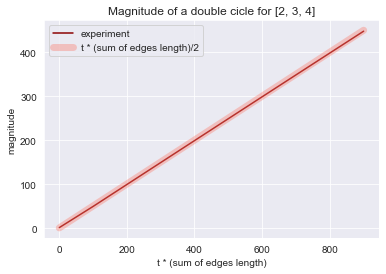

In [60]:
magnitude_res = [elem[-1] for elem in magnitude_measures]
real_mag = [t*(sum([2, 3, 4]))/2 for t in t_vec]
t_len = [t*(sum([2, 3, 4])) for t in t_vec]
sns.lineplot(x=t_len, y=magnitude_res, label='experiment', color='darkred')
sns.lineplot(x=t_len, y=real_mag, alpha=0.4, linewidth=7, label='t * (sum of edges length)/2', color='salmon')
plt.title('Magnitude of a double cicle for [2, 3, 4]')
plt.xlabel('t * (sum of edges length)')
plt.ylabel('magnitude')

In [61]:
print('t * l / 2 - result', 'difference between last measures (uncertainty)', sep='\t')
for elem in [(real_mag[i] - magnitude_res[i], magnitude_measures[i][-1] - magnitude_measures[i][-2]) for i in range(len(real_mag))]:
    print(elem[0], elem[1], sep='\t')

t * l / 2 - result	difference between last measures (uncertainty)
-0.7301011073520995	7.650219850274809e-06
1.068521903541125	0.0061067436427677535
1.0864675630104585	0.019881542159950527
1.1191471377251787	0.05334519716598152
1.1756763607923233	0.11758223323863604
1.264895243952168	0.22326010197824075
1.3954826794645783	0.3807817081874987
1.5759995153634918	0.600336213728724
1.8149108062685286	0.8919098446024805
2.1205969021179385	1.265279540329118


In [62]:
t_vec = np.linspace(0.1, 100, 10)
magnitude_measures = [magnitude(t, [2, 2, 10], dist_cicle32, generate_points_cicle32, [10, 2000, 4], time_lim=90) for t in t_vec]

Text(0, 0.5, 'magnitude')

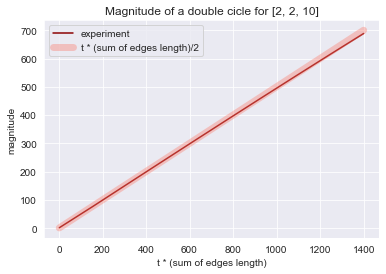

In [63]:
magnitude_res = [elem[-1] for elem in magnitude_measures]
real_mag = [t*(sum([2, 2, 10]))/2 for t in t_vec]
t_len = [t*(sum([2, 2, 10])) for t in t_vec]
sns.lineplot(x=t_len, y=magnitude_res, label='experiment', color='darkred')
sns.lineplot(x=t_len, y=real_mag, alpha=0.4, linewidth=7, label='t * (sum of edges length)/2', color='salmon')
plt.title('Magnitude of a double cicle for [2, 2, 10]')
plt.xlabel('t * (sum of edges length)')
plt.ylabel('magnitude')

In [64]:
print('t * l / 2 - result', 'difference between last measures (uncertainty)', sep='\t')
for elem in [(real_mag[i] - magnitude_res[i], magnitude_measures[i][-1] - magnitude_measures[i][-2]) for i in range(len(real_mag))]:
    print(elem[0], elem[1], sep='\t')

t * l / 2 - result	difference between last measures (uncertainty)
-0.6184948208401314	0.00025448929916893626
1.1070083303883678	0.020079358892388655
1.2122699272369744	0.1464797762043588
1.4897053996056684	0.48573815731347736
2.025139032764457	1.139179888497722
2.9024528920550097	2.201914625657537
4.203373773336864	3.7612556047716907
6.00707487783734	5.895296569400102
8.389773937390942	8.671750092153388
11.424354478405917	12.147083382507276


In [65]:
t_vec

array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7,  77.8,  88.9,
       100. ])

In [67]:
int(0.9)

0

In [66]:
def bellman_ford(
    edges: list[tuple[int, int, int]], vertex_count: int, src: int) -> list[float]:
    """
    Returns shortest paths from a vertex src to all
    other vertices.
    >>> edges = [(2, 1, -10), (3, 2, 3), (0, 3, 5), (0, 1, 4)]
    >>> g = [{"src": s, "dst": d, "weight": w} for s, d, w in edges]
    >>> bellman_ford(g, 4, 4, 0)
    [0.0, -2.0, 8.0, 5.0]
    >>> g = [{"src": s, "dst": d, "weight": w} for s, d, w in edges + [(1, 3, 5)]]
    >>> bellman_ford(g, 4, 5, 0)
    Traceback (most recent call last):
     ...
    Exception: Negative cycle found
    """
    graph = [{"src": s, "dst": d, "weight": w} for s, d, w in edges]
    edge_count = len(edges)
    
    distance = [float("inf")] * vertex_count
    distance[src] = 0.0

    for _ in range(vertex_count - 1):
        for j in range(edge_count):
            u, v, w = (graph[j][k] for k in ["src", "dst", "weight"])

            if distance[u] != float("inf") and distance[u] + w < distance[v]:
                distance[v] = distance[u] + w

    negative_cycle_exists = check_negative_cycle(graph, distance, edge_count)
    if negative_cycle_exists:
        raise Exception("Negative cycle found")

    return distance

In [257]:
class MetricGraph:
    def __init__(self, edges, vertex_count):
        self.edges = [(min(edge[0], edge[1]), max(edge[0], edge[1]), edge[2]) for edge in edges]
        self.graph = [{"src": s, "dst": d, "weight": w} for s, d, w in edges]
        self.weights = dict([((s, d), w) for s, d, w in edges])
        self.vertex_count = vertex_count
        self.edge_count = len(self.edges)
        self.shortest_paths = self.calculate_shortest_paths()
        self.sum_len = sum([w for s, d, w in edges])
    
    def bellman_ford(self, src: int) -> list[float]:
        distance = [float("inf")] * self.vertex_count
        distance[src] = 0.0

        for _ in range(self.vertex_count - 1):
            for j in range(self.edge_count):
                u, v, w = (self.graph[j][k] for k in ["src", "dst", "weight"])
                if distance[u] != float("inf") and distance[u] + w < distance[v]:
                    distance[v] = distance[u] + w
        return distance
    
    def calculate_shortest_paths(self) -> list[list[float]]:
        return [self.bellman_ford(src) for src in range(self.vertex_count)]
    
    def point_params(self, p):
        return min(p[0], p[1]), max(p[0], p[1]), p[2]
    
    def dist(self, p1: tuple[int, int, float], p2: tuple[int, int, float]) -> int:
        v1, v2, vx = self.point_params(p1)
        u1, u2, ux = self.point_params(p2)
        vl, ul = self.weights[(v1, v2)], self.weights[(u1, u2)]
        vy, uy = vl - vx, ul - ux # dist from v2 and u2
        
        possible_paths = []
        if v1 == u1 and v2 == u2: # same edge
            possible_paths.append(abs(vx - ux))
        possible_paths.append(vx + self.shortest_paths[v1][u1] + ux)
        possible_paths.append(vx + self.shortest_paths[v1][u2] + uy)
        possible_paths.append(vy + self.shortest_paths[v2][u1] + ux)
        possible_paths.append(vy + self.shortest_paths[v2][u2] + uy)
        return min(possible_paths)
    
    def generate_points(self, num_points: int) -> list[tuple[int, int, float]]:
        part_len = self.sum_len / num_points
        points = []
        for v, u, w in self.edges:
            points += [(v, u, part_len * i) for i in range(1, int(w / part_len))]
        return points
        
    def calculate_magnitude(self, t: float, num_points: int) -> float:
        points = self.generate_points(num_points)
        distance = np.array([[self.dist(p1, p2) for p1 in points] for p2 in points])
        exp_dist = np.exp(-distance * t)
        exp_dist_inv = np.linalg.inv(exp_dist)
        return np.sum(exp_dist_inv)
    
    def approximate_magnitude_function(self, t_vec, range_params):
        num_points_vec = np.linspace(range_params[0], range_params[1], range_params[2])
        magnitude_measures = [[self.calculate_magnitude(t, num_points) for num_points in num_points_vec] for t in t_vec]
        return magnitude_measures
    
    def plot_magnitude_function(self, t_vec, magnitude_measures, axes):
        magnitude_res = [elem[-1] for elem in magnitude_measures]
        sns.lineplot(x=t_vec, y=magnitude_res, label='experiment', color='darkred', ax=axes)
    
    def absolute_error(self, t_vec, magnitude_measures, real_values, axes):
        measure_error = [abs(elem[-1] - elem[-2]) for elem in magnitude_measures]
        magnitude_error = [abs(elem[-1] - real_values[i]) for i, elem in enumerate(magnitude_measures)]
        sns.lineplot(x=t_vec, y=measure_error, label='convergence delta', color='darkred', ax=axes)
        sns.lineplot(x=t_vec, y=magnitude_error, label='magnitude error', color='salmon', ax=axes)
        return magnitude_error
        
        
    def approx_error(self, t_vec, magnitude_measures, real_values, axes):
        measure_error = [abs(elem[-1] - elem[-2])/elem[-1] for elem in magnitude_measures]
        magnitude_error = [abs(elem[-1] - real_values[i])/elem[-1] for i, elem in enumerate(magnitude_measures)]
        sns.lineplot(x=t_vec, y=measure_error, label='approximate convergence delta', color='darkred', ax=axes)
        sns.lineplot(x=t_vec, y=magnitude_error, label='approximate magnitude error', color='salmon', ax=axes)
        return magnitude_error
    
    def plot_all(self, t_vec, magnitude_measures, real_func, real_func_name, axes):
        ax1, ax2 = axes
        t_len = [self.sum_len * t for t in t_vec]
        real_values = [real_func(t) for t in t_len]
        self.plot_magnitude_function(t_len, magnitude_measures, ax1)
        sns.lineplot(x=t_len, y=real_values, color='salmon', label=real_func_name, ax=ax1)
        print('Absolute delta:', self.absolute_error(t_len, magnitude_measures, real_values, ax2))
        # print('Approximate delta:', self.approx_error(t_len, magnitude_measures, real_values, ax3))
    


In [231]:
tree = MetricGraph(edges=[(0, 1, 2), (0, 2, 3), (0, 3, 1)], vertex_count=4)

In [232]:
tree.calculate_magnitude(t=2, num_points=2000)

6.9869979987453315

In [233]:
t_vec = [0.5, 1, 5, 10, 100, 200, 300, 500]
magnitude_measures = tree.approximate_magnitude_function(t_vec, [10, 1000, 8])

Absolute delta: [0.006497125142842286, 0.01299300128650227, 0.06572522326933061, 0.13740094296964855, 9.854370597816398, 65.17049706673708, 186.87166241701482, 599.2025832768755]
Approximate delta: [0.002605621677181535, 0.0032588358361785594, 0.0041247702948684715, 0.004452021124849149, 0.03384687799727792, 0.12162543628146211, 0.26167798220904437, 0.6644536479758475]


"\nt_vec = [0.5, 1, 5, 10, 100, 200, 300, 500]\nt_len = [6 * t for t in t_vec]\nreal_values = [t/2 + 1 for t in t_len]\ntree.plot_magnitude_function(t_len, magnitude_measures, ax1)\nsns.lineplot(x=t_len, y=[t/2 + 1 for t in t_len], color='salmon', label='t/2 + 1', ax=ax1)\ntree.absolute_error(t_vec, magnitude_measures, real_values, ax2)\ntree.approx_error(t_vec, magnitude_measures, real_values, ax3)\n"

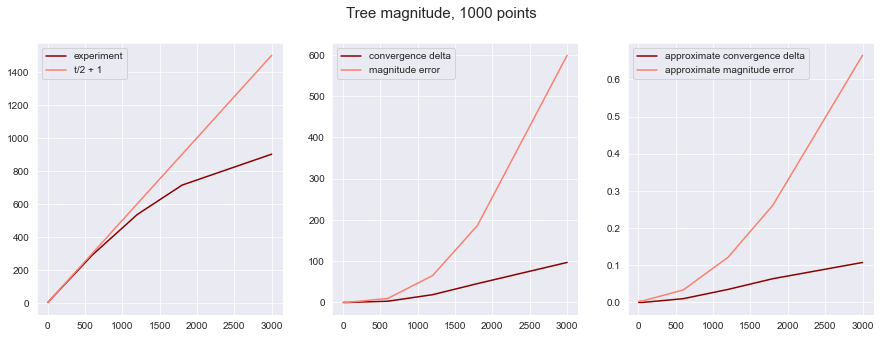

In [234]:
#plt.rcParams["figure.figsize"] = (15, 15)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Tree magnitude, 1000 points', fontsize=15)
tree.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2, ax3))
'''
t_vec = [0.5, 1, 5, 10, 100, 200, 300, 500]
t_len = [6 * t for t in t_vec]
real_values = [t/2 + 1 for t in t_len]
tree.plot_magnitude_function(t_len, magnitude_measures, ax1)
sns.lineplot(x=t_len, y=[t/2 + 1 for t in t_len], color='salmon', label='t/2 + 1', ax=ax1)
tree.absolute_error(t_vec, magnitude_measures, real_values, ax2)
tree.approx_error(t_vec, magnitude_measures, real_values, ax3)
'''

In [235]:
t_vec = [0.5, 1, 5, 10, 100, 200, 300, 500]
magnitude_measures = tree.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [0.0016248203241904235, 0.0032495625158501795, 0.016295314836501262, 0.03296251545467044, 0.8763753512628227, 5.071870659917863, 15.780488887476281, 68.00459302319564]
Approximate delta: [0.0006503508109623715, 0.0008130511440928732, 0.0010194954897801013, 0.001064438775298444, 0.0029200478712348185, 0.008510876413124419, 0.017826639256565552, 0.04745625330835161]


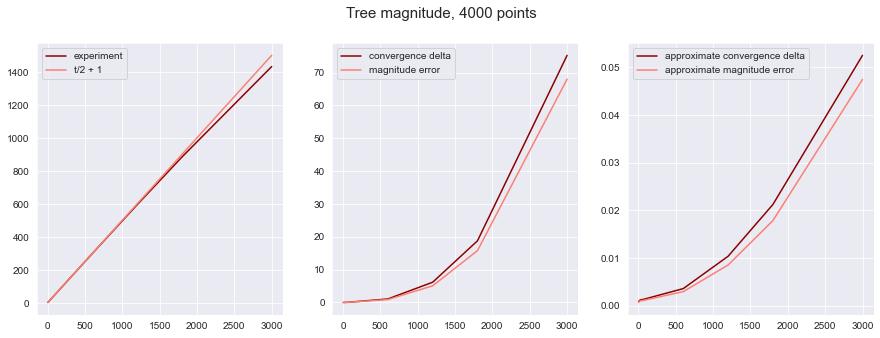

In [236]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
tree.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2, ax3))

In [239]:
t_vec = [1, 5, 10, 100, 200, 300, 500]
cicle = MetricGraph(edges=[(0, 1, 1), (0, 2, 4), (1, 2, 1)], vertex_count=3)

In [240]:
magnitude_measures = cicle.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [2.7669689183542667, 0.9969897435669015, 1.0005476763398455, 1.5689357592482338, 5.517567043741565, 16.0622586247556, 68.19223903535658]
Approximate delta: [2.2440382562466943, 0.06645264693726415, 0.03335219808498729, 0.005239722749630149, 0.009265709176926906, 0.01815072165392553, 0.04759343220575933]


(-2.0, 10.0)

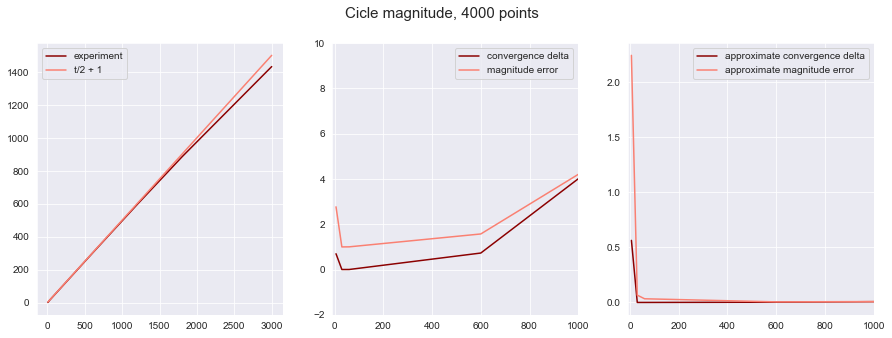

In [241]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Cicle magnitude, 4000 points', fontsize=15)
cicle.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2, ax3))
ax3.set_xlim(-10, 1000)
ax2.set_xlim(-10, 1000)
ax2.set_ylim(-2, 10)

Absolute delta: [1.7669689183542667, 0.0030102564330984904, 0.0005476763398455375, 0.5689357592482338, 4.517567043741565, 15.0622586247556, 67.19223903535658]
Approximate delta: [1.4330286921850208, 0.00020064349631486328, 1.8256211278016993e-05, 0.001900055896641345, 0.007586398512739008, 0.01702069865541951, 0.046895501871178545]


(-2.0, 10.0)

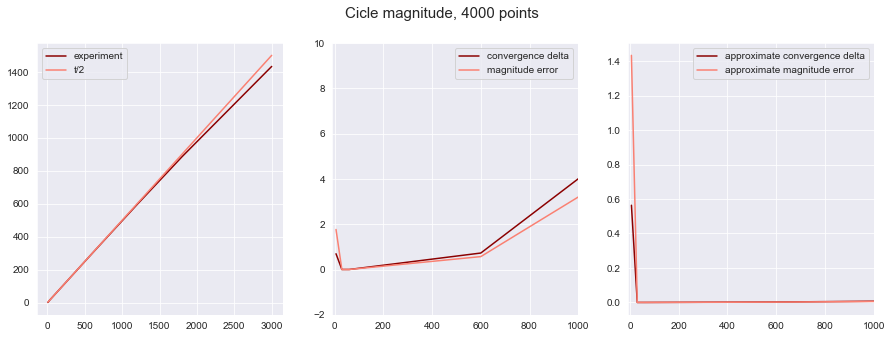

In [242]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Cicle magnitude, 4000 points', fontsize=15)
cicle.plot_all(t_vec, magnitude_measures, lambda t: t/2, 't/2', (ax1, ax2, ax3))
ax3.set_xlim(-10, 1000)
ax2.set_xlim(-10, 1000)
ax2.set_ylim(-2, 10)

In [258]:
t_vec = np.linspace(10, 300, 8)
cicle2 = MetricGraph(edges=[(0, 1, 1), (0, 2, 4), (1, 2, 1), (0, 3, 1), (2, 3, 2)], vertex_count=4)

In [259]:
magnitude_measures = cicle2.approximate_magnitude_function(t_vec, [10, 4000, 4])

In [260]:
magnitude_measures

[[3.9995064211380678,
  43.961449306958436,
  43.983911138595666,
  43.990024881194195],
 [4.0, 228.02341191161963, 229.80786861765907, 230.1384376669062],
 [4.0, 403.2977177340897, 413.39960157563445, 415.29196296618153],
 [4.0, 564.1520131294295, 593.0137890689092, 598.6496785038971],
 [4.0, 706.9707739268159, 767.0664540065392, 779.4433489094389],
 [4.0, 830.12471099429, 934.1877987579823, 956.9505643052375],
 [4.0, 933.6672317726232, 1093.2546500659155, 1130.5057001367484],
 [4.0, 1018.8766687942403, 1243.404530967325, 1299.5084874780482]]

Absolute delta: [2.009975118805805, 2.2901337616652313, 3.5651798909613603, 6.6360357818171, 12.270936804846883, 21.192292837619675, 34.06572843468007, 51.49151252195179]


(-2.0, 20.0)

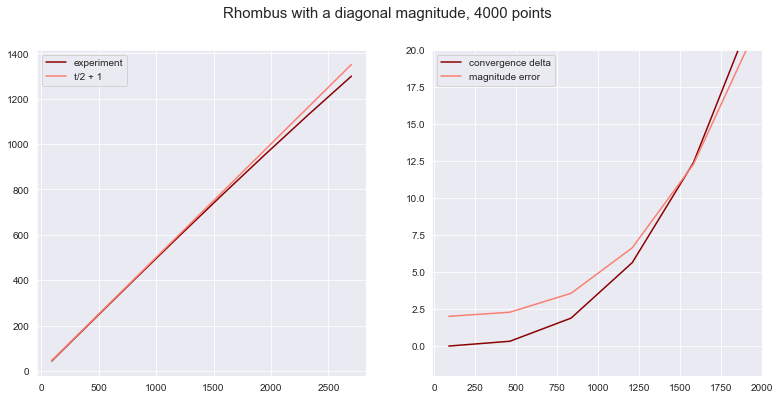

In [282]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Rhombus with a diagonal magnitude, 4000 points', fontsize=15)
cicle2.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2))
ax2.set_xlim(-10, 2000)
ax2.set_ylim(-2, 20)

Absolute delta: [1.009975118805805, 1.2901337616652313, 2.5651798909613603, 5.6360357818171, 11.270936804846883, 20.192292837619675, 33.06572843468007, 50.49151252195179]


(-2.0, 20.0)

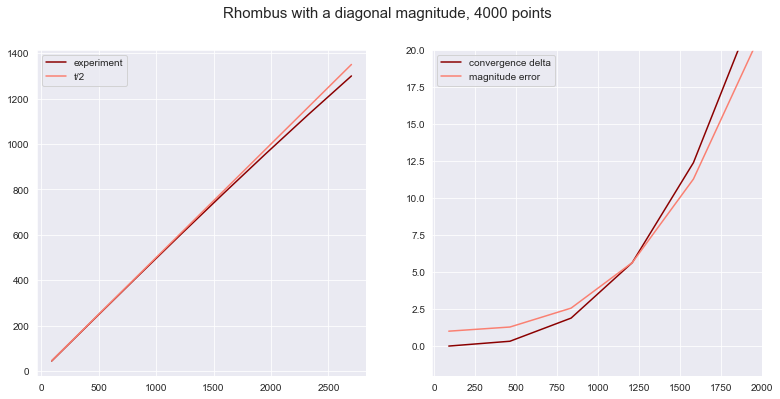

In [281]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Rhombus with a diagonal magnitude, 4000 points', fontsize=15)
cicle2.plot_all(t_vec, magnitude_measures, lambda t: t/2, 't/2', (ax1, ax2))
ax2.set_xlim(-10, 2000)
ax2.set_ylim(-2, 20)

Absolute delta: [0.009975118805805039, 0.2901337616652313, 1.5651798909613603, 4.6360357818171, 10.270936804846883, 19.192292837619675, 32.06572843468007, 49.49151252195179]


(-2.0, 20.0)

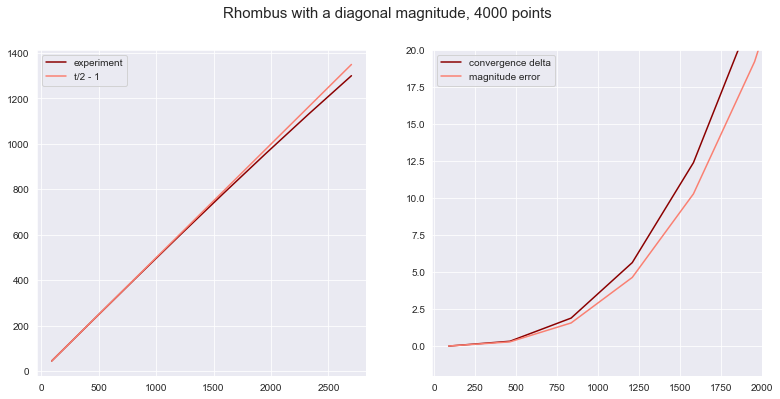

In [278]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Rhombus with a diagonal magnitude, 4000 points', fontsize=15)
cicle2.plot_all(t_vec, magnitude_measures, lambda t: t/2 - 1, 't/2 - 1', (ax1, ax2))
ax2.set_xlim(-10, 2000)
ax2.set_ylim(-2, 20)

Absolute delta: [0.009975118805805039, 0.2901337616652313, 1.5651798909613603, 4.6360357818171, 10.270936804846883, 19.192292837619675, 32.06572843468007, 49.49151252195179]


(-2.0, 10.0)

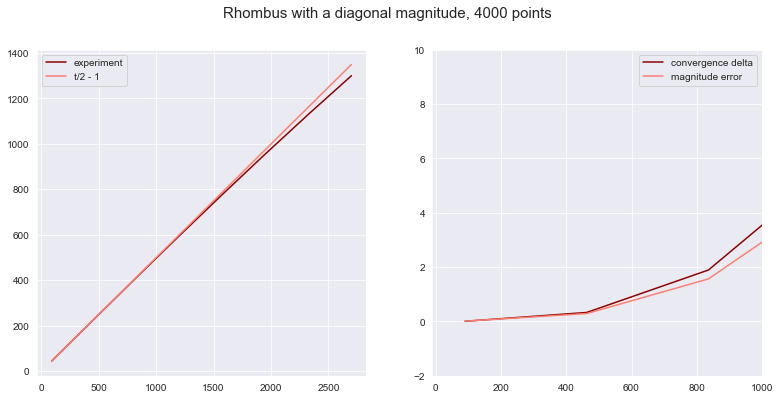

In [280]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Rhombus with a diagonal magnitude, 4000 points', fontsize=15)
cicle2.plot_all(t_vec, magnitude_measures, lambda t: t/2 - 1, 't/2 - 1', (ax1, ax2))
ax2.set_xlim(-10, 1000)
ax2.set_ylim(-2, 10)

In [283]:
tree1 = MetricGraph(edges=[(0, 2, 1), (1, 2, 1), (3, 4, 1), (3, 5, 1), (2, 3, 2)], vertex_count=6)

In [292]:
t_vec = np.linspace(10, 300, 8)
magnitude_measures = tree1.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [0.04638185272110107, 0.30570494993943953, 0.8530328123746358, 1.9272324079346959, 3.7633556066949723, 6.5907557375254555, 10.63128723641853, 16.097631954141434]


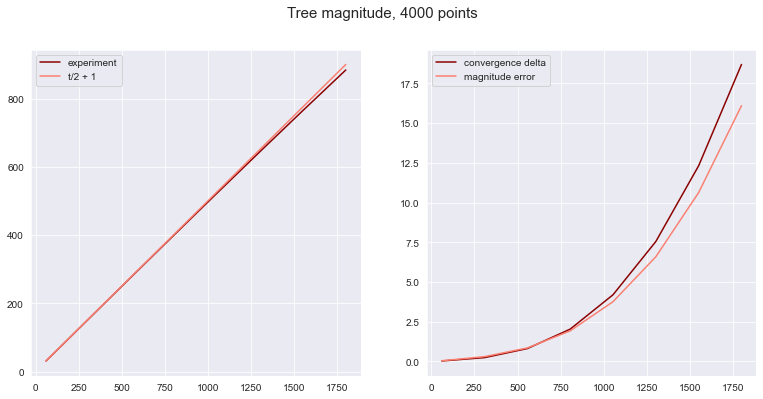

In [293]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
tree1.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2))

In [294]:
tree1.sum_len

6

In [297]:
tree2 = MetricGraph(edges=[(0, 2, 1), (1, 2, 1), (3, 4, 1), (3, 5, 1), (3, 6, 1), (2, 3, 2)], vertex_count=7)

In [298]:
t_vec = np.linspace(10, 300, 8)
magnitude_measures = tree2.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [0.06889053284882607, 0.4599175361313428, 1.3055770065390675, 2.9827592000692675, 5.860198280313853, 10.294577881706118, 16.62686682653373, 25.178987338760862]


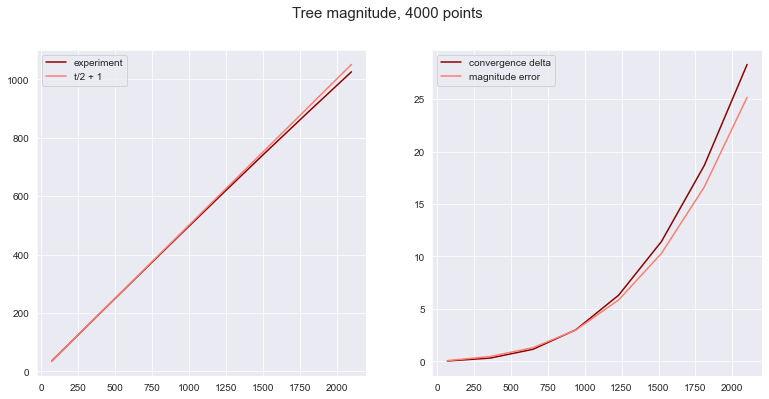

In [299]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
tree2.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2))

In [300]:
tree3 = MetricGraph(edges=[(0, 1, 1), (0, 2, 11), (0, 3, 1), (0, 4, 2), (0, 5, 1), (0, 6, 1)], vertex_count=7)

In [301]:
t_vec = np.linspace(10, 300, 8)
magnitude_measures = tree3.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [0.23739352670830272, 2.8373406170242106, 11.979552790228468, 32.58421762153944, 68.91906056702305, 124.40769716989007, 201.5264024140581, 301.7897386753725]


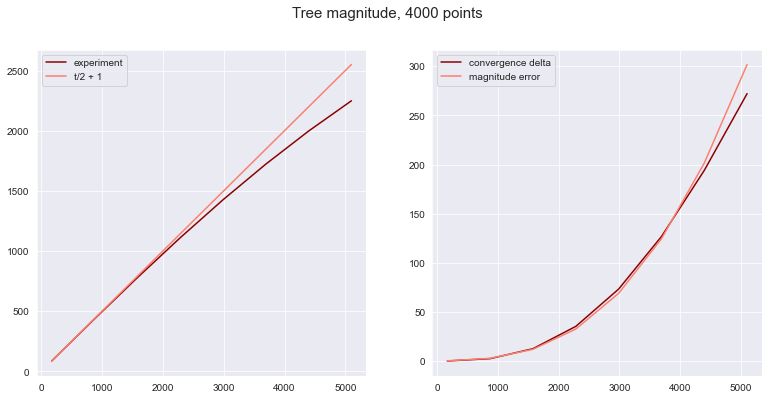

In [302]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
tree3.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2))

In [303]:
cicle_1edge = MetricGraph(edges=[(0, 1, 1), (1, 2, 2), (0, 2, 1), (0, 3, 2)], vertex_count=4)

In [304]:
t_vec = np.linspace(10, 300, 8)
magnitude_measures = cicle_1edge.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [1.012938012673093, 1.1389367928111938, 1.5618064446015865, 2.5209906917416447, 4.251548517265178, 6.9823409771248635, 10.934325973586965, 16.3190154677701]


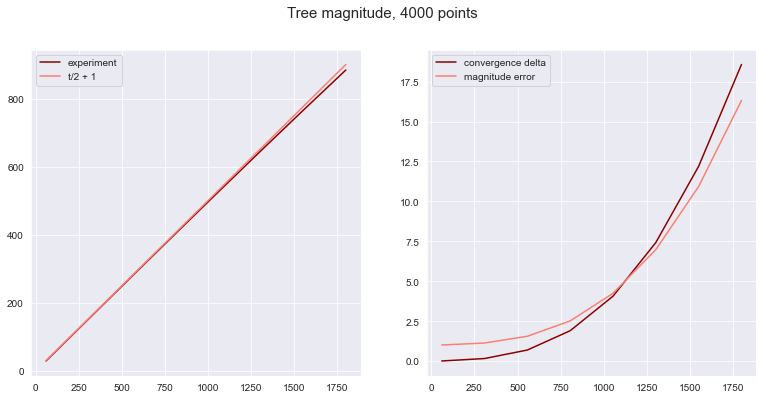

In [305]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
cicle_1edge.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2))

Absolute delta: [0.012938012673092913, 0.13893679281119375, 0.5618064446015865, 1.5209906917416447, 3.251548517265178, 5.9823409771248635, 9.934325973586965, 15.3190154677701]


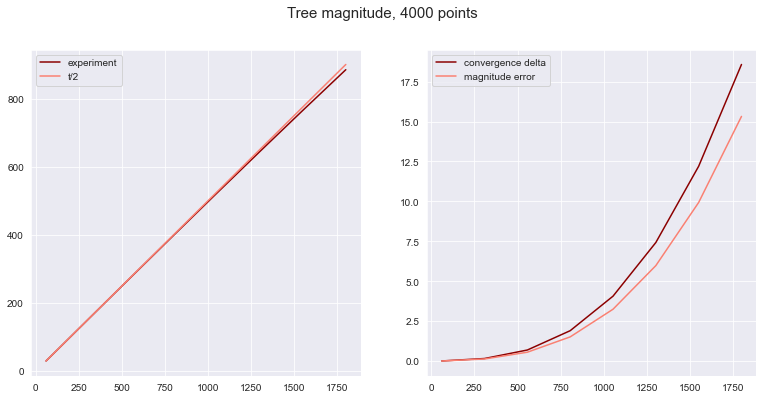

In [306]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
cicle_1edge.plot_all(t_vec, magnitude_measures, lambda t: t/2, 't/2', (ax1, ax2))

Absolute delta: [0.9870619873269071, 0.8610632071888062, 0.43819355539841354, 0.5209906917416447, 2.251548517265178, 4.9823409771248635, 8.934325973586965, 14.3190154677701]


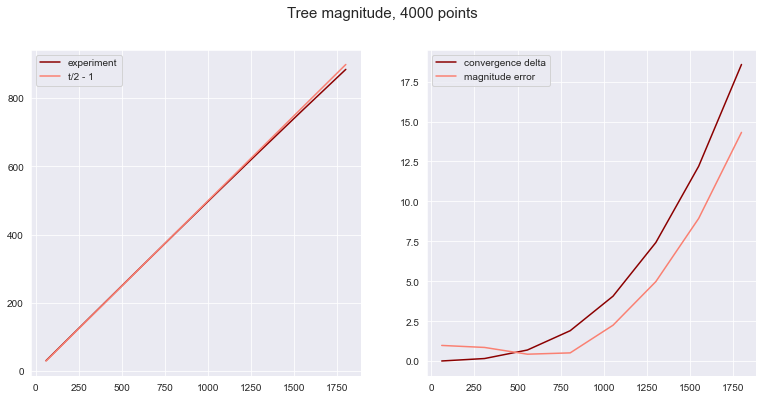

In [307]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
cicle_1edge.plot_all(t_vec, magnitude_measures, lambda t: t/2 - 1, 't/2 - 1', (ax1, ax2))

In [308]:
cicle_2edge = MetricGraph(edges=[(0, 1, 1), (1, 2, 2), (0, 2, 1), (0, 3, 2), (1, 4, 1)], vertex_count=5)

In [309]:
t_vec = np.linspace(10, 300, 8)
magnitude_measures = cicle_2edge.approximate_magnitude_function(t_vec, [10, 4000, 4])

Absolute delta: [1.0354656576497803, 1.294005748046004, 2.018266605178667, 3.586809227759602, 6.36898774895667, 10.721098551182308, 16.982881928398, 25.474456768840582]


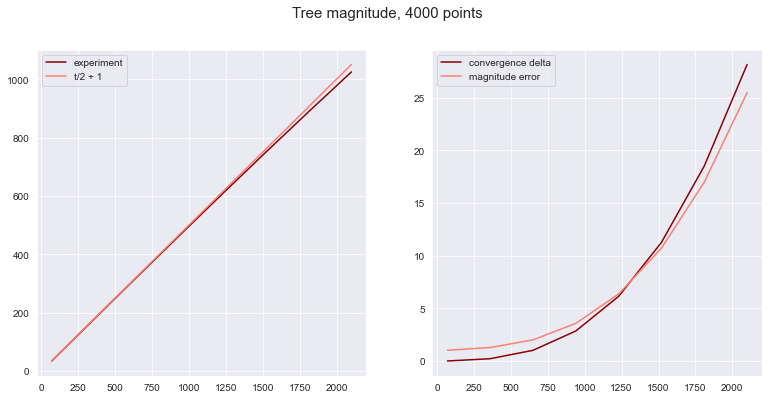

In [310]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
cicle_2edge.plot_all(t_vec, magnitude_measures, lambda t: t/2 + 1, 't/2 + 1', (ax1, ax2))

Absolute delta: [0.03546565764978027, 0.2940057480460041, 1.0182666051786669, 2.586809227759602, 5.36898774895667, 9.721098551182308, 15.982881928398001, 24.474456768840582]


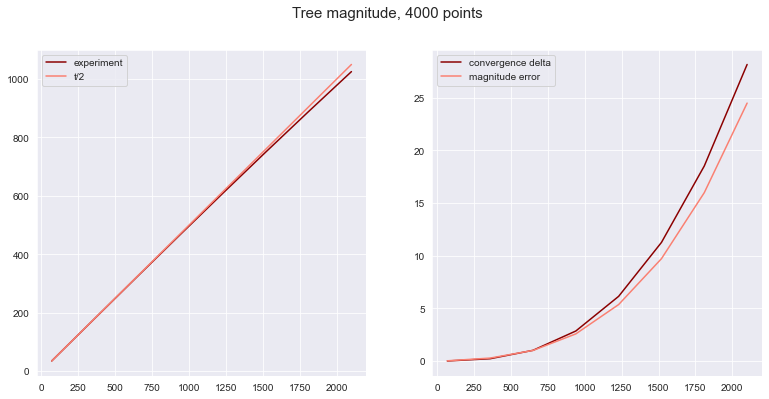

In [311]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
cicle_2edge.plot_all(t_vec, magnitude_measures, lambda t: t/2, 't/2', (ax1, ax2))

Absolute delta: [0.9645343423502197, 0.7059942519539959, 0.01826660517866685, 1.586809227759602, 4.36898774895667, 8.721098551182308, 14.982881928398001, 23.474456768840582]


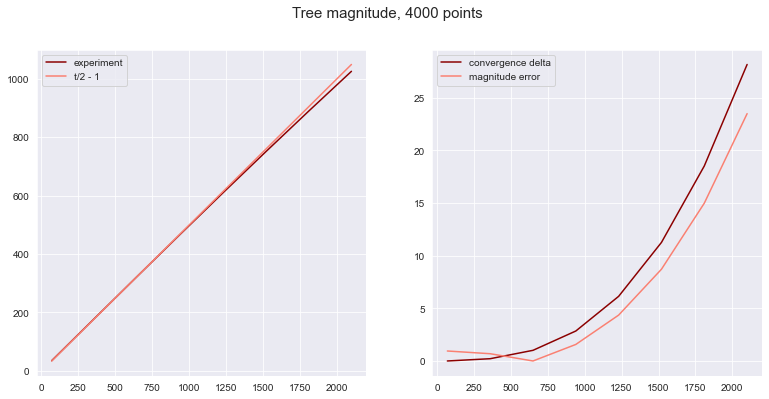

In [312]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
fig.suptitle('Tree magnitude, 4000 points', fontsize=15)
cicle_2edge.plot_all(t_vec, magnitude_measures, lambda t: t/2 - 1, 't/2 - 1', (ax1, ax2))